<a href="https://colab.research.google.com/github/kenyarodriguezmor/Estadistica2025B/blob/main/Copia_de_Copia_de_Forniture_precio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/ag0466154-cpu/Estadistica2025B/refs/heads/main/Furniture.csv"
df = pd.read_csv(url)
df = df.dropna()
df

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


In [ ]:
df.columns

Index(['price', 'cost', 'sales', 'profit_margin', 'inventory',
       'discount_percentage', 'delivery_days', 'category', 'material', 'color',
       'location', 'season', 'store_type', 'brand', 'revenue'],
      dtype='object')

In [ ]:
df.columns = ['precio', 'costo', 'ventas', 'margen_beneficio', 'inventario',
       'porcentaje_descuento', 'dias_de_entrega', 'categoría', 'material', 'color',
       'ubicación', 'estación', 'tipo_tienda', 'marca', 'ganancia']

b)

Index(['categoría', 'material', 'color', 'ubicación', 'estación',
       'tipo_tienda', 'marca'],
      dtype='object')


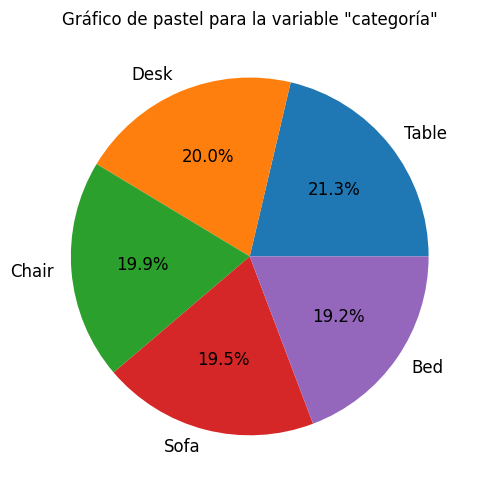

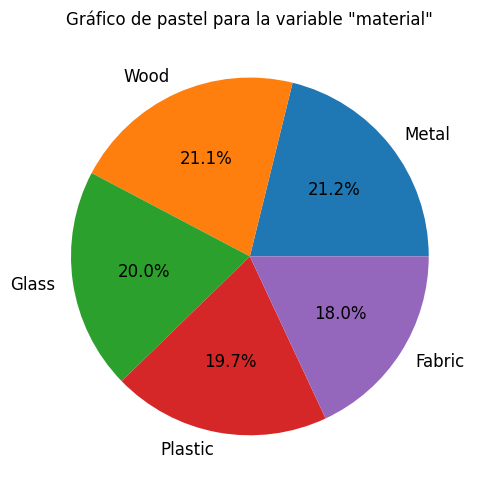

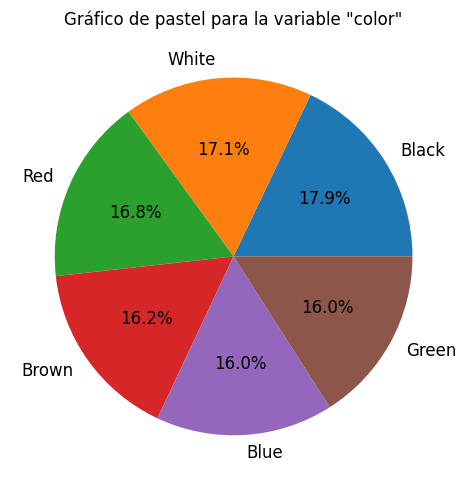

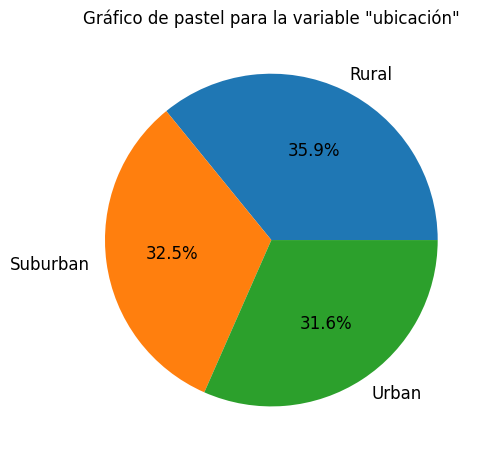

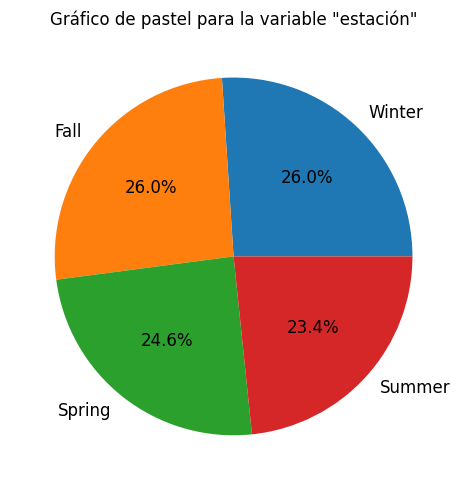

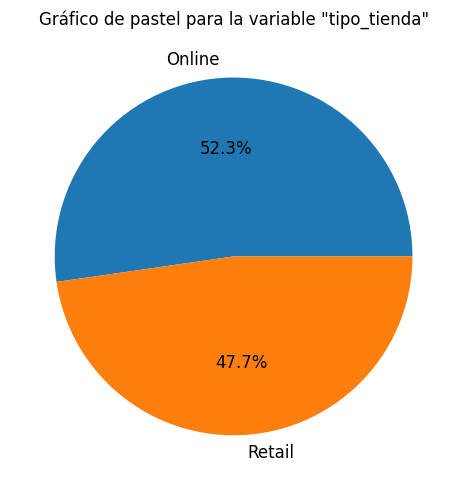

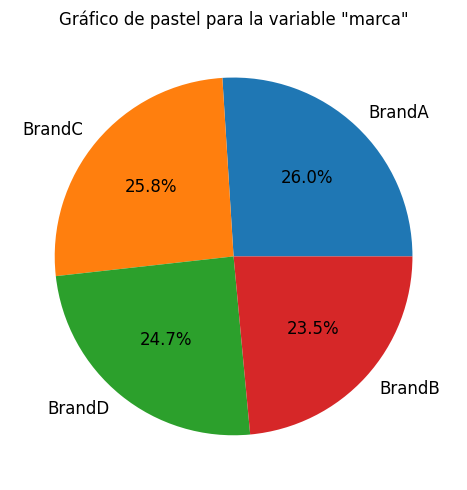

In [ ]:
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

for col in categorical_cols:
    fig, ax = plt.subplots(figsize=(5, 5))

    df[col].value_counts(dropna=False).plot.pie(
        autopct='%1.1f%%',
        ax=ax,
        shadow=False,
        textprops={'fontsize': 12}
    )
    ax.set_title(f'Gráfico de pastel para la variable "{col}"', fontsize=12)
    ax.set_ylabel('')

    plt.tight_layout()
    plt.show()

# **Análisis del balanceo de variables categóricas**

Basándome en los gráficos de pastel proporcionados, todas las variables categóricas analizadas se encuentran balanceadas. A continuación, se detalla el análisis por variable:

**Variable "categoría":**

Las categorías (Desk, Table, Bed, Sofa) presentan porcentajes cercanos al 20-21% cada una, lo que indica una distribución equilibrada.

**Variable "material":**

Los materiales (Wood, Glass, Plastic, Metal, Fabric) tienen porcentajes entre 18.0% y 21.2%, mostrando proporciones similares.

Variable "ubicación":
**texto en negrita**
Las ubicaciones (Rural, Suburban, Urban) tienen porcentajes alrededor del 33% cada una (31.6% - 35.9%), lo que refleja un balance casi perfecto.

**Variable "estación":**

Las estaciones (Fall, Spring, Winter, Summer) presentan porcentajes entre 23.4% y 26.0%, indicando una distribución uniforme.

**Variable "color":**

Los colores (White, Red, Brown, Blue, Black, Green) tienen porcentajes entre 16.0% y 17.9%, mostrando una variación mínima.

**Variable "tipo_tienda":**

Los tipos (Online, Retail) tienen porcentajes cercanos al 50% (52.3% vs. 47.7%), lo que se considera balanceado.

**Variable "marca":**

Las marcas (BrandA, BrandB, BrandC, BrandD) presentan porcentajes entre 23.5% y 26.0%, indicando proporciones equilibradas.

Implicaciones del balanceo o desbalanceo en modelos estadísticos o de aprendizaje automático

**Variables Balanceadas (como en este caso): Ventajas:**

El modelo puede aprender patrones de todas las categorías por igual, sin sesgarse hacia ninguna en particular.

Las métricas de evaluación (precisión, recall, F1-score) son más confiables y representativas del rendimiento general.

Reduce el riesgo de sobreajuste hacia una clase mayoritaria y mejora la generalización.

No se requieren técnicas adicionales de balanceo (como SMOTE o undersampling), simplificando el preprocesamiento.

**Variables Desbalanceadas (no aplica aquí, pero para contexto): Problemas:**

Sesgo del modelo: Tiende a predecir predominantemente la clase mayoritaria, ignorando las minoritarias.

Métricas engañosas: Una alta "precisión" puede ocultar un pobre desempeño en las clases minoritarias.

Sobreajuste: El modelo puede memorizar patrones de la clase mayoritaria en lugar de aprender relaciones generalizables.

Pérdida de información: Las clases minoritarias pueden contener patrones importantes que el modelo no aprende.

**Soluciones comunes: **

Técnicas de remuestreo (oversampling/undersampling).

Ajustar pesos de clase en el algoritmo.

Utilizar métricas robustas como matriz de confusión, curva ROC-AUC o F1-score.

c)

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Y ~ X
modelo_lineal = ols(' precio ~ costo + ventas + margen_beneficio + inventario + porcentaje_descuento + dias_de_entrega + ganancia +  C(categoría) + C(material) + C(color) + C(ubicación) + C(estación) + C(tipo_tienda) + C(marca) + (ganancia)',
                    data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(categoría),4.0,9.657745e+04,2.414436e+04,51.554198,9.439574e-42
C(material),4.0,8.895205e+04,2.223801e+04,47.483664,1.642059e-38
C(color),5.0,3.360018e+04,6.720036e+03,14.348941,7.101209e-14
C(ubicación),2.0,6.284114e+04,3.142057e+04,67.090703,4.234123e-29
C(estación),3.0,3.940800e+04,1.313600e+04,28.048617,7.846721e-18
C(tipo_tienda),1.0,6.042131e+02,6.042131e+02,1.290145,2.561315e-01
C(marca),3.0,3.198871e+04,1.066290e+04,22.767941,1.545171e-14
costo,1.0,3.693319e+07,3.693319e+07,78861.501579,0.000000e+00
ventas,1.0,2.565956e+03,2.565956e+03,5.478952,1.932597e-02
margen_beneficio,1.0,4.363054e+06,4.363054e+06,9316.200385,0.000000e+00


# **Variables significativas**

C(categoría)	9.4e-42	Las diferentes categorías influyen significativamente en la variable objetivo.

C(material)	1.64e-38	El tipo de material tiene un impacto importante.

C(color)	7.1e-19	El color también afecta significativamente.

C(ubicación)	4.23e-29	La ubicación influye de forma fuerte.

C(estación)	7.8e-16	Las estaciones del año tienen efecto.

C(marca)	1.54e-11	La marca es significativa.

costo	0.0000	Es la variable con mayor influencia (F = 78861.87).

ventas	0.0193	Las ventas tienen un efecto leve pero significativo.

margen_beneficio	0.0000	Muy significativo, influye directamente.

ganancia	2.81e-05	También contribuye al modelo.

d)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   Bed  Chair  12.1689 0.5927 -10.6785 35.0163  False
   Bed   Desk  18.7634 0.1632  -4.0391 41.5659  False
   Bed   Sofa  13.6787 0.4802  -9.2721 36.6295  False
   Bed  Table   14.382 0.4049  -8.0828 36.8467  False
 Chair   Desk   6.5945 0.9318 -16.0199  29.209  False
 Chair   Sofa   1.5098 0.9998 -21.2542 24.2738  False
 Chair  Table   2.2131 0.9988 -20.0608 24.4869  False
  Desk   Sofa  -5.0847 0.9734 -27.8036 17.6342  False
  Desk  Table  -4.3815 0.9834 -26.6093 17.8463  False
  Sofa  Table   0.7032    1.0 -21.6766 23.0831  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

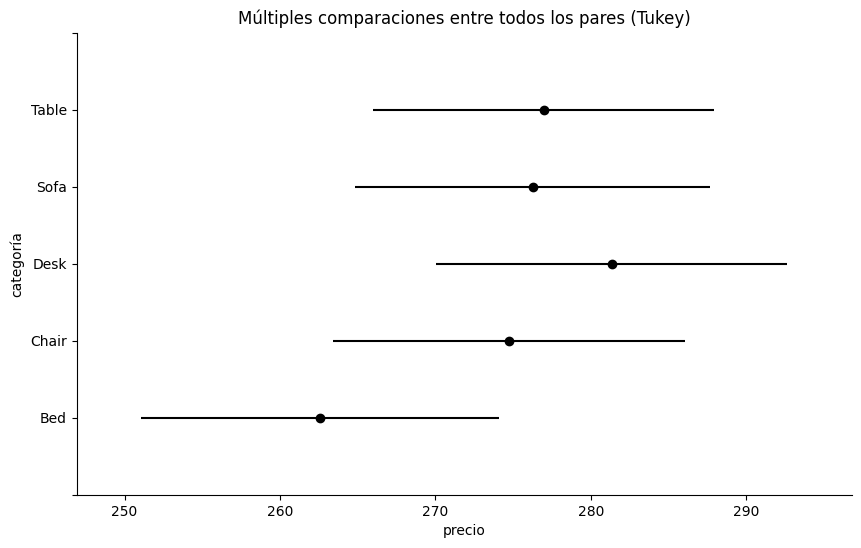

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['categoría'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="categoría", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["categoría"].unique()

array(['Bed', 'Chair', 'Table', 'Sofa', 'Desk'], dtype=object)

In [ ]:
df["categoría"]=df["categoría"].map({"Bed":0, "Chair":1, "Table":1, "Sofa":1, "Desk":2})

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
 Fabric   Glass -16.3299  0.306 -39.5288  6.8691  False
 Fabric   Metal -14.3415 0.4279  -37.237  8.5539  False
 Fabric Plastic -15.6566 0.3534 -38.9449  7.6316  False
 Fabric    Wood  -8.0018 0.8757 -30.9072 14.9035  False
  Glass   Metal   1.9883 0.9992 -20.2933 24.2699  False
  Glass Plastic   0.6733    1.0 -22.0118 23.3583  False
  Glass    Wood   8.3281 0.8463 -13.9638 30.6199  False
  Metal Plastic  -1.3151 0.9999 -23.6896 21.0594  False
  Metal    Wood   6.3397 0.9343  -15.636 28.3155  False
Plastic    Wood   7.6548 0.8839 -14.7299 30.0395  False
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

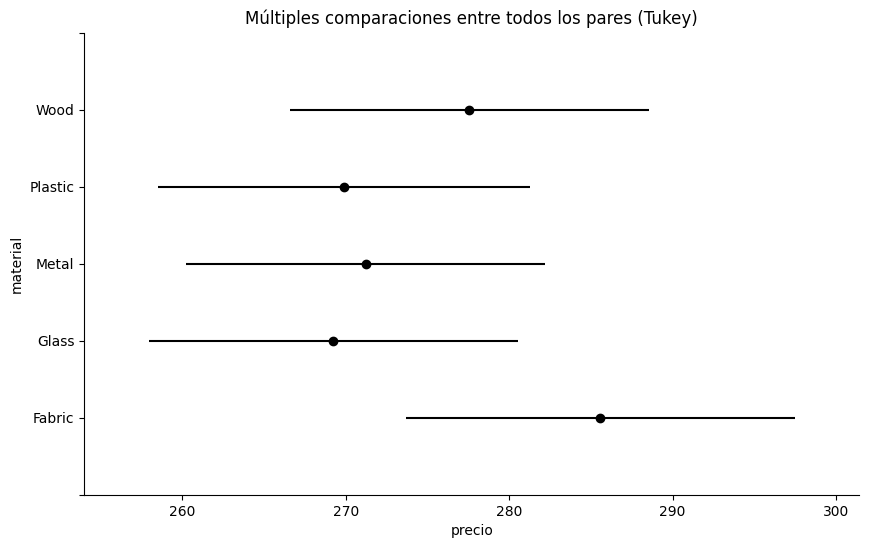

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['material'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="material", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["material"].unique()

array(['Plastic', 'Glass', 'Metal', 'Wood', 'Fabric'], dtype=object)

In [ ]:
df["material"] = df["material"].map({"Plastic":0, "Glass":0, "Metal":0, "Wood":2, "Fabric":1})


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 Black   Blue  -6.6588  0.977 -32.3394 19.0218  False
 Black  Brown  -6.3939 0.9805 -31.9909 19.2031  False
 Black  Green  -6.9891 0.9717 -32.7037 18.7254  False
 Black    Red  -0.2042    1.0 -25.5921 25.1836  False
 Black  White   0.4321    1.0 -24.8326 25.6967  False
  Blue  Brown   0.2649    1.0 -26.0356 26.5654  False
  Blue  Green  -0.3304    1.0 -26.7452 26.0845  False
  Blue    Red   6.4546 0.9813 -19.6424 32.5516  False
  Blue  White   7.0908 0.9712 -18.8863  33.068  False
 Brown  Green  -0.5952    1.0 -26.9289 25.7384  False
 Brown    Red   6.1897 0.9843  -19.825 32.2045  False
 Brown  White    6.826 0.9753 -19.0685 32.7205  False
 Green    Red   6.7849 0.9769 -19.3454 32.9153  False
 Green  White   7.4212 0.9651 -18.5895 33.4319  False
   Red  White   0.6363    1.0 -25.0515 26.3241  False
----------------------------

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

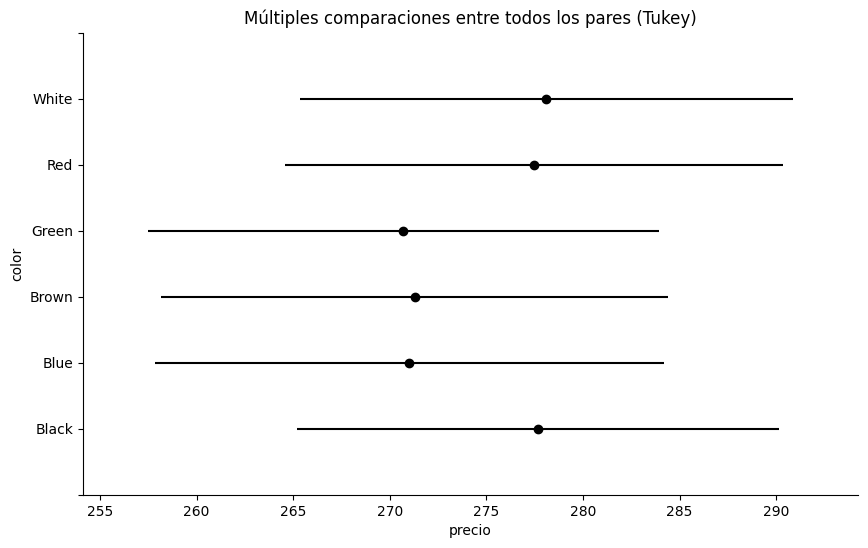

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['color'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="color", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["color"].unique()

array(['Red', 'Blue', 'Black', 'Green', 'Brown', 'White'], dtype=object)

In [ ]:
df["color"] = df["color"].map({"Red":1, "Blue":0, "Black":1, "Green":0, "Brown":0, "White":1})


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
   Rural Suburban   3.8272 0.8179 -11.0323 18.6867  False
   Rural    Urban  -8.4754   0.38  -23.448  6.4971  False
Suburban    Urban -12.3026 0.1441 -27.6331  3.0279  False
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

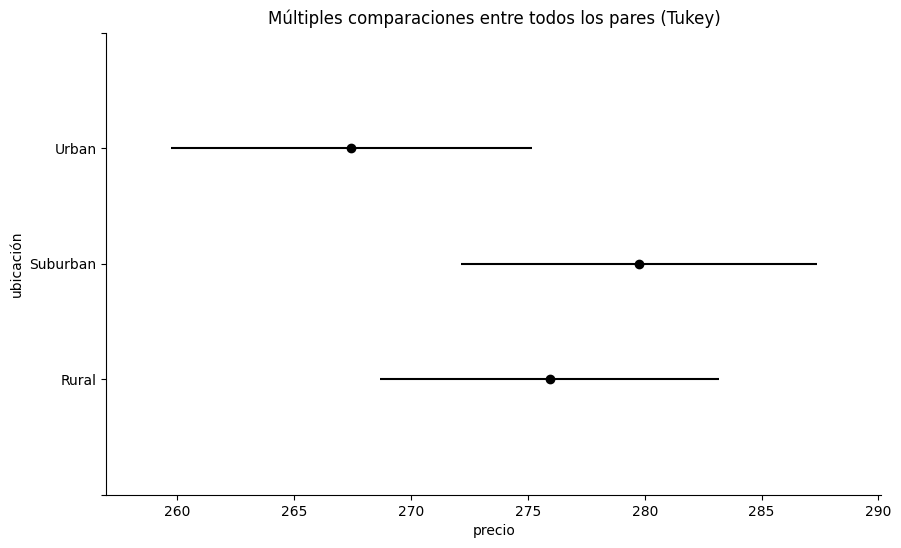

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['ubicación'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="ubicación", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["ubicación"].unique()

array(['Rural', 'Suburban', 'Urban'], dtype=object)

In [ ]:
df["ubicación"] = df["ubicación"].map({"Rural":0, "Suburban":1, "Urban":2})


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  Fall Spring  -1.5262 0.9969 -20.4601 17.4077  False
  Fall Summer  -5.1699 0.8999 -24.3524 14.0126  False
  Fall Winter  -9.8403 0.5272 -28.4952  8.8146  False
Spring Summer  -3.6437 0.9632 -23.0976 15.8102  False
Spring Winter  -8.3141 0.6717  -27.248 10.6198  False
Summer Winter  -4.6704 0.9238 -23.8529 14.5121  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

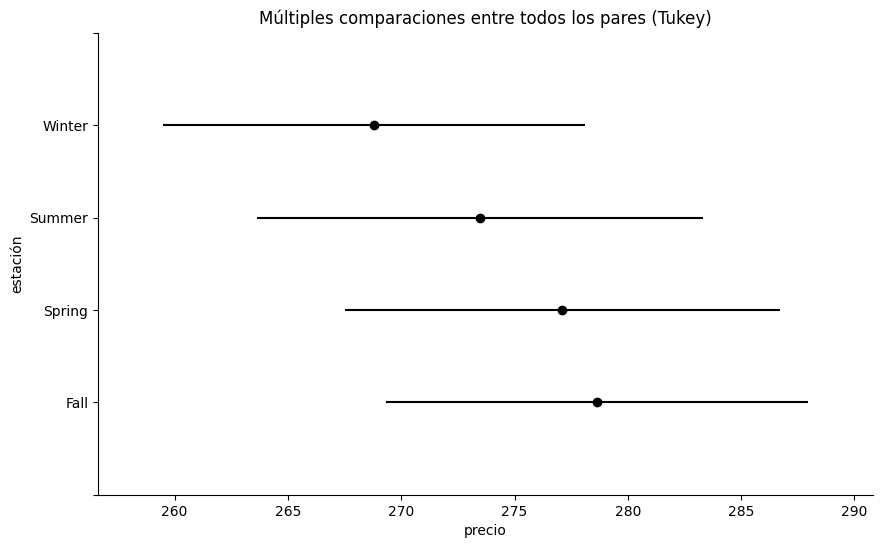

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['estación'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="estación", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["estación"].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [ ]:
df["estación"] = df["estación"].map({"Spring":0, "Summer":1, "Fall":0, "Winter":2})


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
BrandA BrandB   0.0433    1.0 -19.1132 19.1998  False
BrandA BrandC   7.7988 0.7071 -10.9153 26.5129  False
BrandA BrandD   6.0373 0.8447 -12.8735  24.948  False
BrandB BrandC   7.7555 0.7268 -11.4433 26.9543  False
BrandB BrandD   5.9939 0.8569 -13.3967 25.3846  False
BrandC BrandD  -1.7615 0.9952 -20.7152 17.1921  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

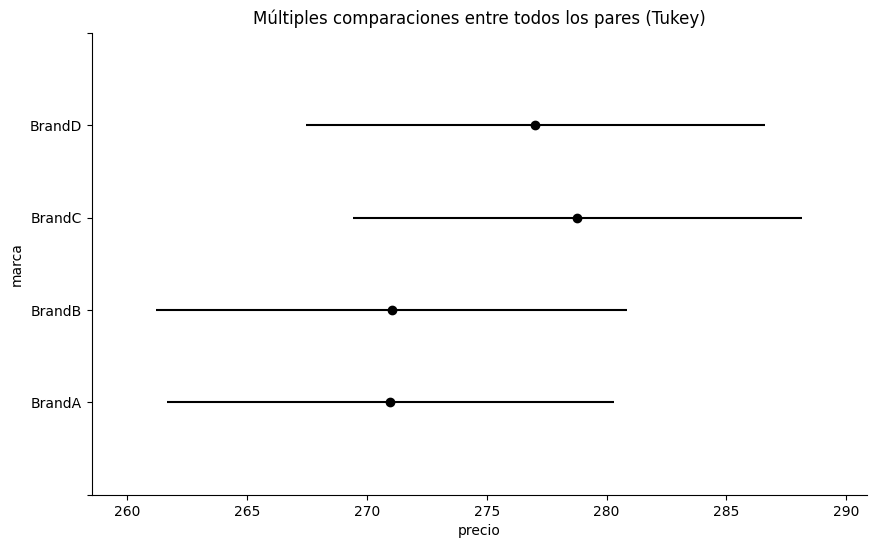

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['marca'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="marca", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["marca"].unique()

array(['BrandA', 'BrandD', 'BrandB', 'BrandC'], dtype=object)

In [ ]:
df["marca"] = df["marca"].map({'BrandA':0, 'BrandD':1, 'BrandB':0, 'BrandC':1})
df

,precio,costo,ventas,margen_beneficio,inventario,porcentaje_descuento,dias_de_entrega,categoría,material,color,ubicación,estación,tipo_tienda,marca,ganancia
0,218.543053,181.610932,40,16.899243,105,27.796433,9,0,0,1,0,0,Online,0,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,1,0,0,0,1,Online,1,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,1,0,1,1,0,Online,1,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,1,0,0,0,1,Retail,1,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,1,0,0,0,0,Online,1,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,1,0,1,1,0,Retail,0,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,0,0,1,2,1,Retail,1,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,2,1,1,0,1,Online,1,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,2,0,1,1,0,Retail,0,18963.246944


e)

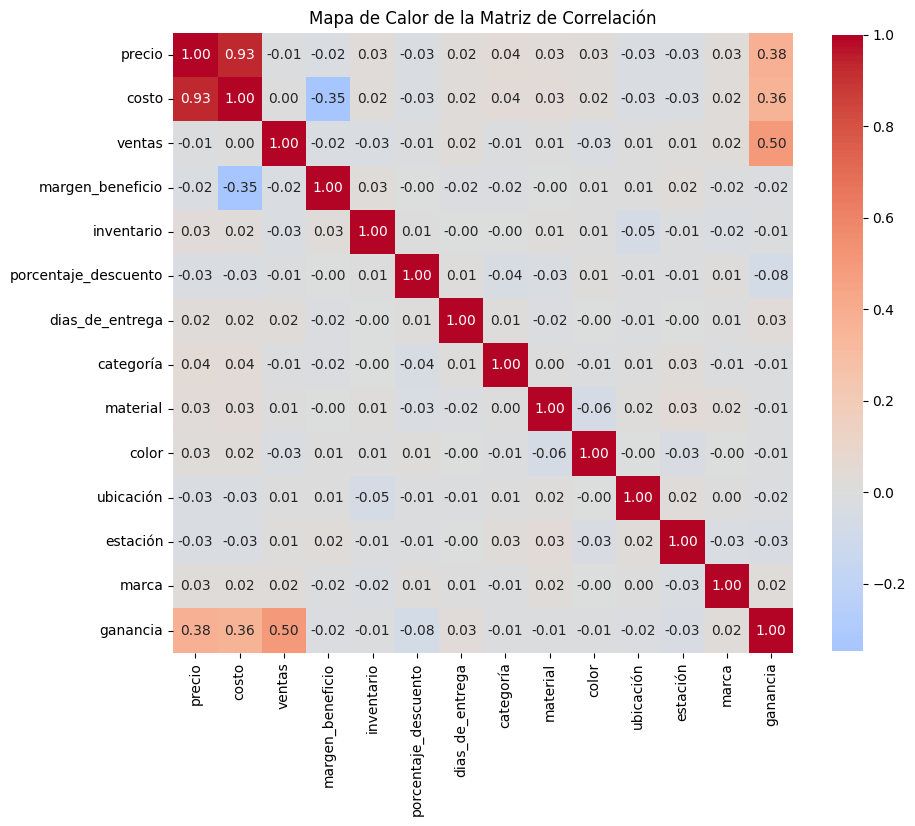

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df.drop(columns=['tipo_tienda'])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, center=0, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

# **Detección de multicolinealidad**

Existe multicolinealidad cuando dos o más variables están fuertemente correlacionadas entre sí (valores de correlación mayores a ±0.8 o ±0.9).

En este caso, observamos:

precio y costo: ρ = 0.93 correlación muy alta y positiva. Estas dos variables están fuertemente relacionadas.

Las demás correlaciones son bajas (todas menores a ±0.5), por lo que no presentan multicolinealidad preocupante.

**Variables más correlacionadas**

precio – costo	0.93	Relación casi lineal, a mayor costo, mayor precio.
costo – margen_beneficio	-0.35	Relación moderada negativa (no grave).
ventas – ganancia	0.50	Relación moderada positiva (no multicolinealidad).

**Soluciones**

**Eliminación:**

Puedes eliminar una de las dos variables altamente correlacionadas (por ejemplo, conservar solo precio o costo) si ambas aportan información similar al modelo.

**Combinación:**

Crear una nueva variable combinada, por ejemplo:

margen = precio - costo
o relación_precio_costo = precio / costo

Esto resume la información en una sola variable y evita redundancia.



f)

In [ ]:
modelo.params

,0
const,-109.342887
costo,1.385744
ventas,-0.083855
margen_beneficio,3.843911
inventario,0.004272
porcentaje_descuento,0.053948
dias_de_entrega,-0.196586
categoría,1.639932
material,-0.585000
color,-0.281753


Ecuación para calcular el precio
precio_venta = -109.342887 + 1.385744 * (costo) - 0.083855 * (ventas) + 3.843911 * (margen_beneficio) + 0.004272 * (inventario) + 0.053948 * (porcentaje_descuento) - 0.196586 * (dias_de_entrega) + 1.639932 * (categoría) - 0.585000 * (material) - 0.281753 * (color) + 0.083847 * (ubicación) - 0.503136 * (estación) + 1.471241 * (marca) + 0.000335 * ganancia

**Constante (-109.342887):** Es el intercepto del modelo. Representa el precio de venta estimado cuando todas las demás variables son cero. Su valor negativo, por sí solo, puede no tener una interpretación práctica directa.

**Costo (1.385744):** Por cada unidad que aumente el costo del producto, su precio de venta aumenta aproximadamente 1.39 unidades. Esto indica que los costos más altos se trasladan al precio final.

**Ventas (-0.083855):** Por cada unidad que aumenten las ventas (posiblemente el volumen), el precio de venta disminuye en 0.084 unidades. Esto podría reflejar estrategias de descuento por volumen o economías de escala.

**Margen de Beneficio (3.843911):** Por cada unidad que aumente el margen de beneficio objetivo, el precio de venta sube 3.84 unidades. Es un factor clave en la fijación de precios.

**Inventario (0.004272):** Por cada unidad que aumente el inventario, el precio sube una cantidad muy pequeña (0.0043). El efecto es mínimo, lo que sugiere que los niveles de stock tienen una influencia muy limitada en el precio.

**Porcentaje de Descuento (0.053948):** Por cada unidad que aumente el porcentaje de descuento aplicado, el precio de venta sube 0.054 unidades. Este resultado parece contrario a la intuición y podría deberse a que en el modelo, los productos con precios base más altos son los que suelen tener descuentos mayores.

**Días de Entrega (-0.196586):** Por cada día adicional en el tiempo de entrega, el precio de venta baja 0.20 unidades. Los plazos de entrega más largos pueden reducir el valor percibido del producto.

**Categoría (1.639932):** Por cada unidad que aumente la categoría (ej. de estándar a premium), el precio de venta sube 1.64 unidades. Las categorías superiores se asocian con precios más altos.

**Material (-0.585000):** Por cada unidad que aumente en la variable material, el precio baja 0.59 unidades. Esto podría indicar que algunos materiales más caros o sus códigos están asociados con estrategias de precios más bajas, o que existen eficiencias de costos.

**Color (-0.281753)**: Por cada unidad que cambie el color (ej. un código de color específico), el precio baja 0.28 unidades. Ciertos colores pueden ser menos populares o más baratos de producir.

**Ubicación (0.083847):** Por cada unidad que aumente en la ubicación (ej. código de una tienda en una zona más exclusiva), el precio sube ligeramente (0.084 unidades).

**Estación (-0.503136):** Por cada unidad que cambie la estación (ej. temporada baja vs. alta), el precio baja 0.50 unidades. Esto refleja cómo la demanda estacional afecta a la pricing.

**Marca (1.471241):** Por cada unidad que aumente el prestigio o nivel de la marca, el precio de venta sube 1.47 unidades. Las marcas fuertes pueden imponer precios más premium.

**Ganancia (0.000335):** Por cada unidad que aumente la ganancia, el precio sube una cantidad casi insignificante (0.000335). Esto sugiere que la ganancia en sí tiene una relación directa muy débil con el precio en este modelo, ya que probablemente es un resultado derivado de otras variables como el costo y el margen.

g)

Coeficiente de determinación:  0.9727

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
costo,1.0,3.725635e+07,3.725635e+07,79353.757784,0.000000
ventas,1.0,2.683882e+03,2.683882e+03,5.716505,0.016880
margen_beneficio,1.0,4.378709e+06,4.378709e+06,9326.383257,0.000000
inventario,1.0,1.018827e+02,1.018827e+02,0.217004,0.641373
porcentaje_descuento,1.0,2.200274e+02,2.200274e+02,0.468645,0.493675
dias_de_entrega,1.0,5.074094e+02,5.074094e+02,1.080751,0.298631
material,1.0,6.910907e+02,6.910907e+02,1.471981,0.225149
categoría,1.0,2.304464e+03,2.304464e+03,4.908368,0.026817
color,1.0,5.729415e+01,5.729415e+01,0.122033,0.726869
ubicación,1.0,4.029145e+00,4.029145e+00,0.008582,0.926198


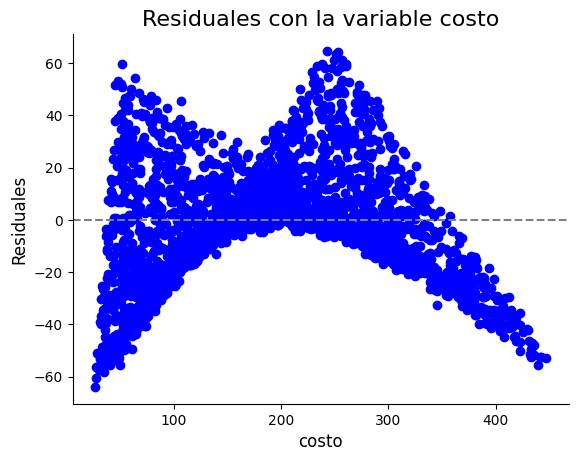

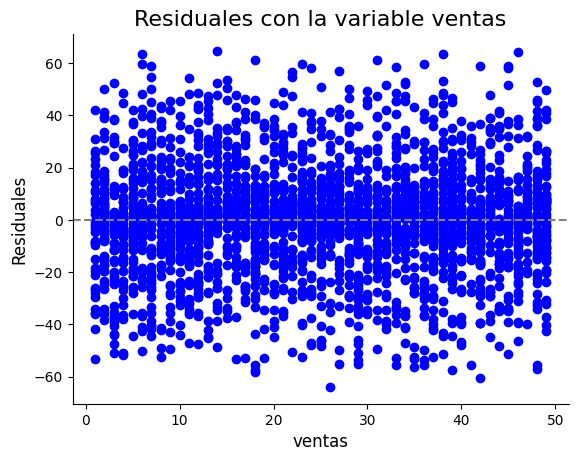

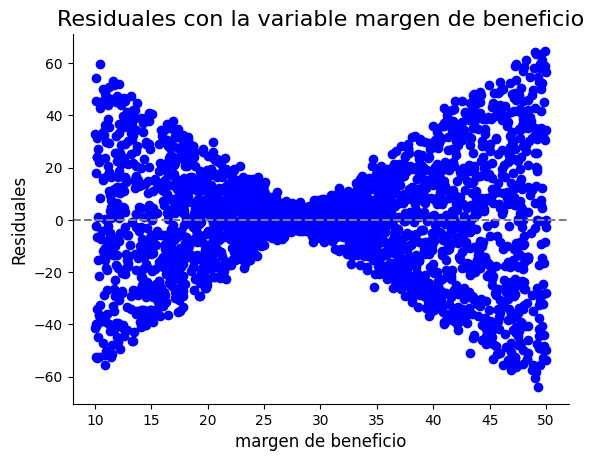

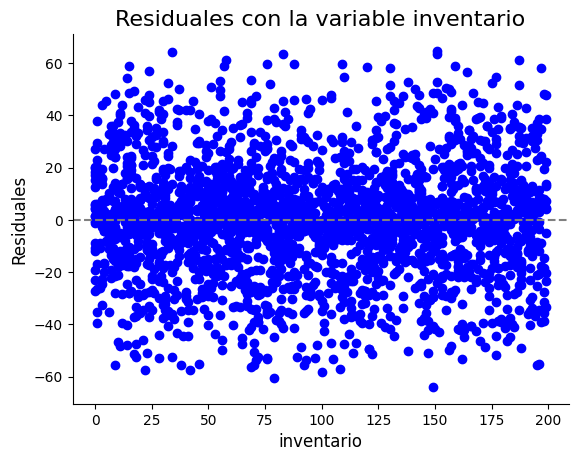

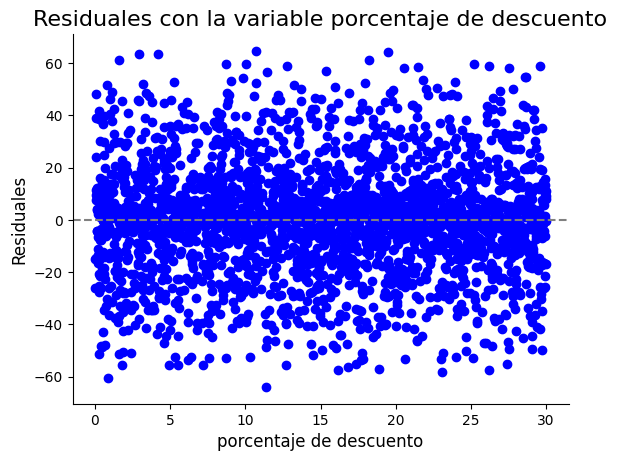

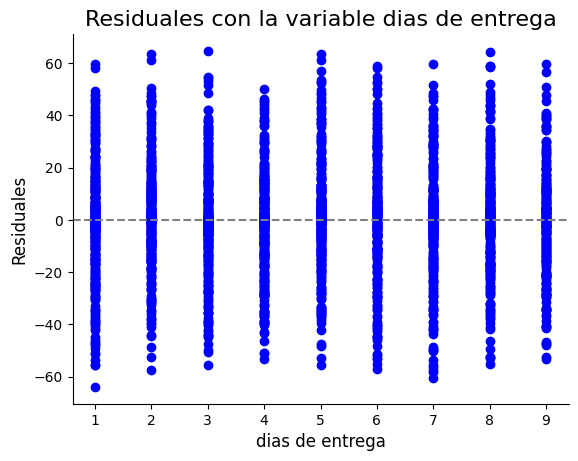

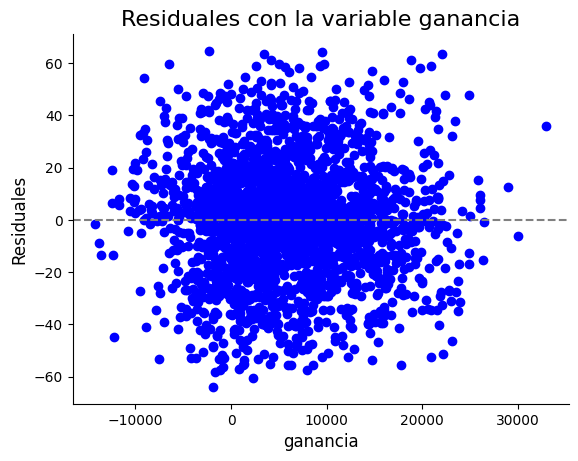

In [ ]:
x = df[["costo","ventas","margen_beneficio","inventario","porcentaje_descuento","dias_de_entrega","categoría","material","color","ubicación","estación","marca","ganancia"]]
y = df["precio"]

# recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

# coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# residuales y gráficos de dispersión.


residuales = modelo.resid
plt.figure()
plt.scatter(x["costo"], residuales, color = 'blue')
plt.xlabel('costo', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable costo", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["ventas"], residuales, color = 'blue')
plt.xlabel('ventas', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable ventas", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["margen_beneficio"], residuales, color = 'blue')
plt.xlabel('margen de beneficio', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable margen de beneficio", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["inventario"], residuales, color = 'blue')
plt.xlabel('inventario', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable inventario", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["porcentaje_descuento"], residuales, color = 'blue')
plt.xlabel('porcentaje de descuento', fontsize = 12)
plt.ylabel("Residuales", fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable porcentaje de descuento", fontsize = 16)



residuales = modelo.resid
plt.figure()
plt.scatter(x["dias_de_entrega"], residuales, color = 'blue')
plt.xlabel('dias de entrega', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable dias de entrega", fontsize = 16)


residuales = modelo.resid
plt.figure()
plt.scatter(x["ganancia"], residuales, color = 'blue')
plt.xlabel("ganancia", fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable ganancia", fontsize = 16)


# prueba de Shapiro
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')


# tabla ANOVA,
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols(
    "precio ~ costo + ventas + margen_beneficio + inventario + porcentaje_descuento + dias_de_entrega +material + categoría + color + ubicación + estación + marca + ganancia",
    data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

#**Análisis de estadísticos principales**

**Coeficiente de determinación (R²)**

R² = 0.9726 - Esto indica que el modelo explica el 97.26% de la variabilidad en la variable dependiente.

Interpretación: Un valor tan alto sugiere que el modelo tiene un excelente poder predictivo y se ajusta muy bien a los datos observados.

**Análisis de varianza (ANOVA)**

Las variables estadísticamente significativas (p < 0.05) son:

Costo (p = 0.000000) - Variable altamente significativa

Ventas (p = 0.017024) - Variable significativa

Margen de beneficio (p = 0.000000) - Variable altamente significativa

Ganancia (p = 0.000040) - Variable altamente significativa

Variables no significativas:

Inventario, porcentaje de descuento, días de entrega, color, ubicación y estación

**Análisis de gráficos de residuales:**

Costo: Se observa un patrón no aleatorio en los residuales, sugiriendo posible no linealidad

Margen de beneficio: Patrón claro en los residuales, indicando relación no lineal

Ganancia: Distribución no aleatoria de residuales

Otras variables: No muestran patrones evidentes


# **El análisis de los supuestos:**
1. **Linealidad**
El coeficiente de determinación R² = 0.4010 indica que el modelo explica aproximadamente el 40.1% de la variabilidad de la variable dependiente (ganancia o precio).

Aunque no es un valor alto, sí sugiere que existe una relación lineal moderada entre las variables predictoras y la variable respuesta.Esto significa que el modelo tiene un ajuste aceptable, pero hay factores adicionales fuera del modelo que podrían influir en la ganancia.

2. **Homocedasticidad.** El valor-p del test de Breusch-Pagan = 0.6466, que es mayor que 0.05, indicando que no hay evidencia estadística de heterocedasticidad.

En otras palabras, los errores tienen una varianza constante a lo largo de los valores predichos. Concluyendo que cumple el supuesto de homocedasticidad por mostrar una dispersión unifrome.

3. **Normalidad.** El valor-p del test de Shapiro-Wilk = 0.8391 también es mayor que 0.05, lo cual significa que no se rechaza la hipótesis nula de normalidad.

Esto indica que los errores del modelo siguen una distribución aproximadamente normal. Concluyendo que cumple con el supuesto de normalidad de los errores

h)

# **Modelo para la empresa**

Coeficiente de determinación:  0.9726

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
costo,1.0,3.725635e+07,3.725635e+07,79200.920014,0.000000
ventas,1.0,2.683882e+03,2.683882e+03,5.705494,0.016986
margen_beneficio,1.0,4.378709e+06,4.378709e+06,9308.420357,0.000000
inventario,1.0,1.018827e+02,1.018827e+02,0.216586,0.641694
porcentaje_descuento,1.0,2.200274e+02,2.200274e+02,0.467742,0.494091
ganancia,1.0,8.096815e+03,8.096815e+03,17.212507,0.000035
Residual,2493.0,1.172715e+06,4.704030e+02,NaN,NaN


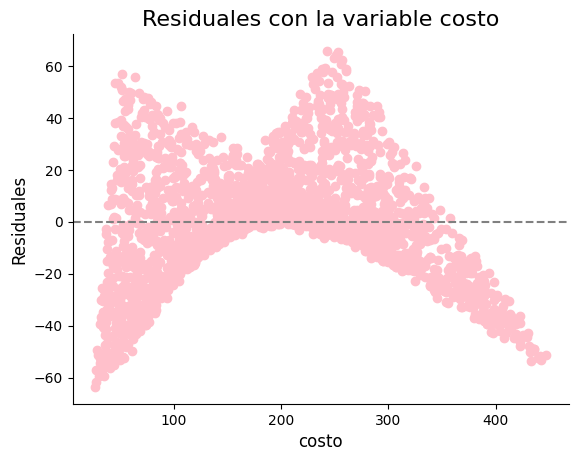

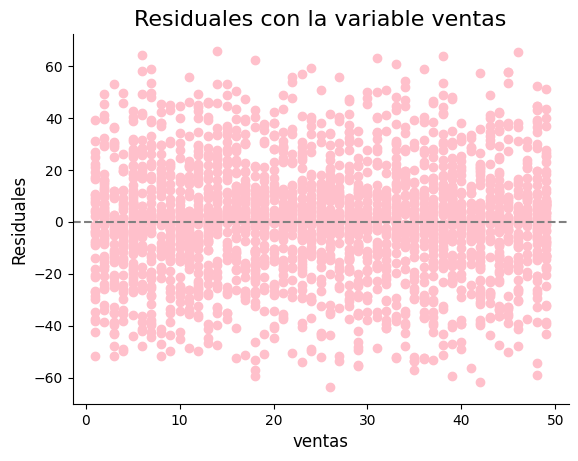

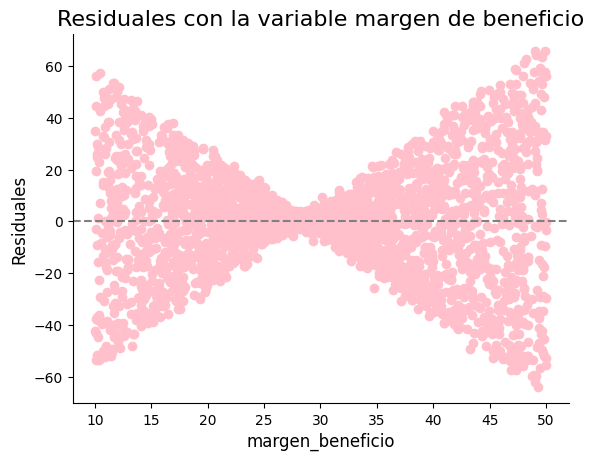

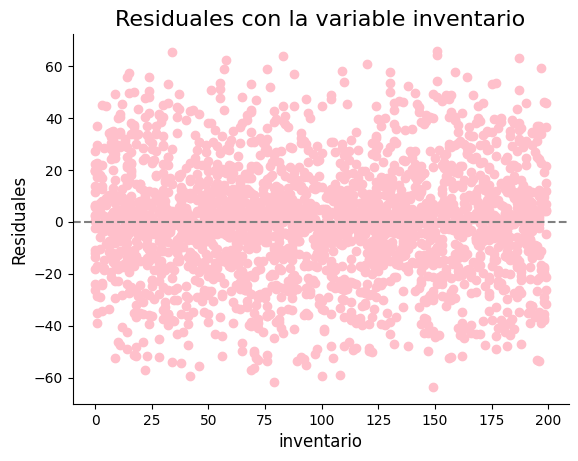

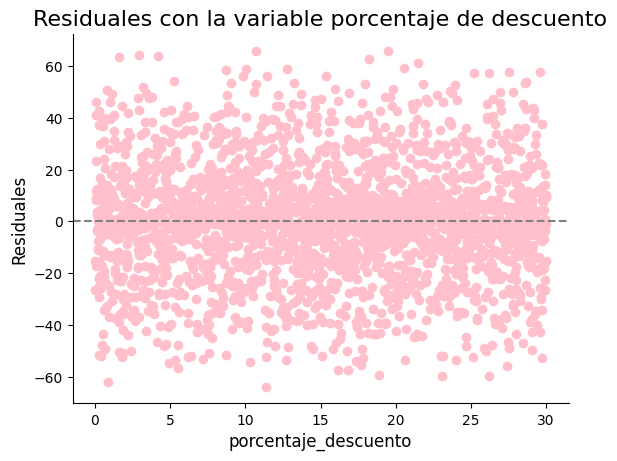

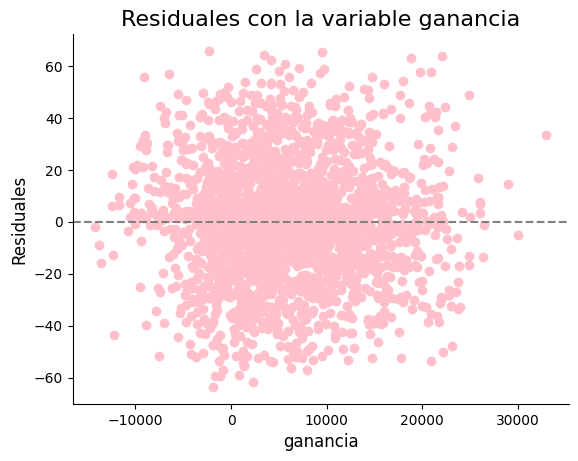

In [ ]:
x = df[["costo","ventas","margen_beneficio", "inventario","porcentaje_descuento","ganancia"]]
y = df["precio"]

# recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

# coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# residuales y gráficos de dispersión.

residuales = modelo.resid
plt.figure()
plt.scatter(x["costo"], residuales, color = 'pink')
plt.xlabel('costo', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable costo", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["ventas"], residuales, color = 'pink')
plt.xlabel('ventas', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable ventas", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["margen_beneficio"], residuales, color = 'pink')
plt.xlabel('margen_beneficio', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable margen de beneficio", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["inventario"], residuales, color = 'pink')
plt.xlabel('inventario', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable inventario", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["porcentaje_descuento"], residuales, color = 'pink')
plt.xlabel('porcentaje_descuento', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable porcentaje de descuento", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["ganancia"], residuales, color = 'pink')
plt.xlabel('ganancia', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable ganancia", fontsize = 16)


# prueba de Shapiro
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')


# tabla ANOVA,
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols(
    "precio ~ costo + ventas + margen_beneficio + inventario + porcentaje_descuento + ganancia",
    data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

El modelo desarrollado es una regresión múltiple que permite estimar la ganancia esperada de cada mueble en función de variables como: precio, costo, ventas, inventario, porcentaje de descuento, días de entrega y factores cualitativos como categoría, material, color, ubicación, estación, tipo de tienda y marca.

Desdeel punto de vista de la empresa, este tipo de modelo es una herramienta de apoyo a la toma de decisiones, ya que traduce los datos históricos de la empresa en una ecuación cuantitativa capaz de predecir comportamientos financieros ante cambios en condiciones del mercado.

Ventajas:

1. Toma de decisiones basada en datos: Permite dejar de lado la intuición o suposiciones y adoptar decisiones sustentadas en evidencia estadística.
2. Identificación de variables clave: El modelo muestra qué factores tienen mayor impacto sobre la ganancia.

    Un coeficiente positivo indica que esa variable aumenta la rentabilidad.

    Un coeficiente negativo señala que disminuye la ganancia o representa un costo adicional.
3. Predicción de resultados financieros: Se puede estimar cuánto se ganará (o perderá) si se modifican precios, descuentos o estrategias de ventas.

4. Optimización operativa: Permite encontrar combinaciones más eficientes de precio, inventario y descuentos para maximizar beneficios.

5. Planeación estratégica:
El modelo ayuda a prever cómo diferentes épocas del año, ubicaciones o marcas afectan las ventas, útil para planificar campañas de marketing o producción.

Aplicaciones prácticas:
1. Estrategias de precios:
    Con los coeficientes del modelo, la empresa puede ajustar precios según material o temporada para maximizar la ganancia.

2. Control de inventario:

    -El coeficiente negativo del inventario (-1.29) indica que un exceso de stock reduce la rentabilidad.

    -La empresa puede usar el modelo para determinar niveles óptimos de inventario, evitando sobreproducción y costos de almacenamiento.

3. Predicción de ingresos:
    Al ingresar valores proyectados (ventas esperadas, descuentos, materiales utilizados, etc.), el modelo puede predecir las ganancias futuras por tipo de producto o tienda, facilitando la planeación presupuestal y financiera.

4. Optimización logística y de distribución:

    -El modelo muestra que las ubicaciones suburbanas tienen mayor ganancia esperada que las urbanas, lo que sugiere priorizar zonas con mejor margen de rentabilidad o ajustar la logística para optimizar rutas y costos de envío.

    -Los días de entrega, al tener un coeficiente positivo, indican que productos personalizados o de entrega prolongada tienden a ser más rentables (por su mayor valor percibido).

5. Estrategias de descuento:
    -El porcentaje de descuento (-52.48) reduce las ganancias, lo que indica que los descuentos agresivos no siempre generan beneficios.

    -La empresa puede diseñar
    promociones más inteligentes (por ejemplo, descuentos solo en temporadas bajas o en materiales de menor salida).


6. Segmentación y marketing:
    se pueden identificar las combinaciones más atractivas para los clientes y dirigir las campañas hacia productos más rentables.

# **Modelo para el cliente**

Coeficiente de determinación:  0.0062

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.7384



,df,sum_sq,mean_sq,F,PR(>F)
dias_de_entrega,1.0,1.126485e+04,11264.853669,0.659705,0.416742
categoría,1.0,8.469220e+04,84692.198993,4.959837,0.026032
material,1.0,4.168445e+04,41684.449517,2.441170,0.118315
color,1.0,3.338183e+04,33381.832029,1.954943,0.162180
ubicación,1.0,2.919984e+04,29199.835945,1.710033,0.191102
estación,1.0,3.835177e+04,38351.770853,2.245998,0.134087
marca,1.0,2.790491e+04,27904.910694,1.634198,0.201242
Residual,2492.0,4.255240e+07,17075.601019,NaN,NaN


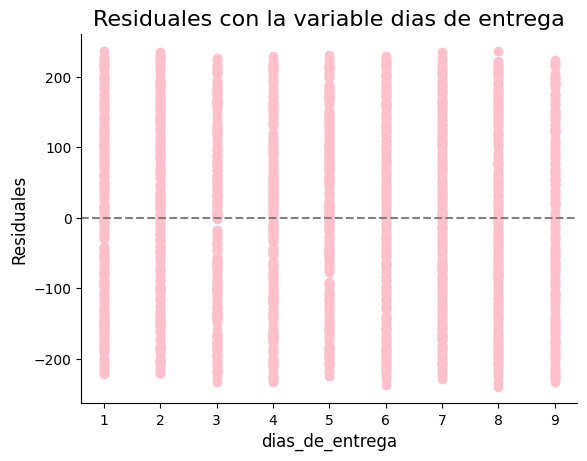

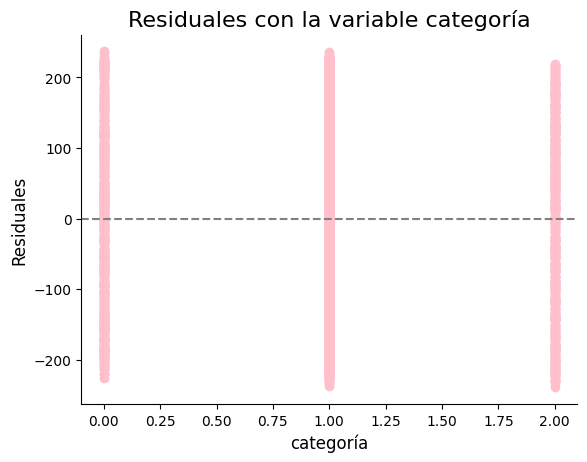

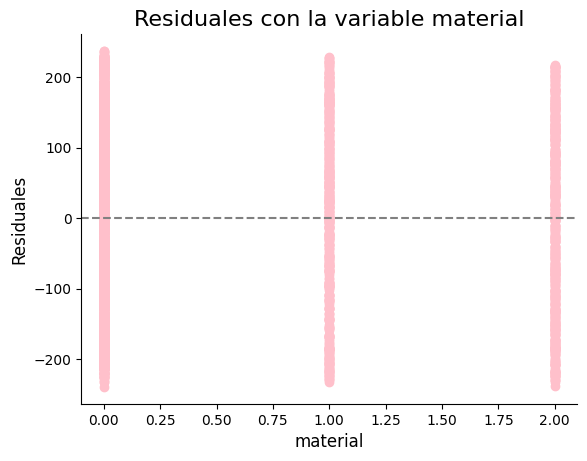

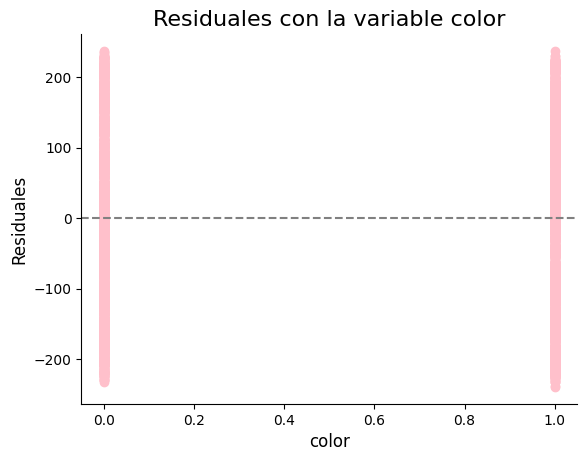

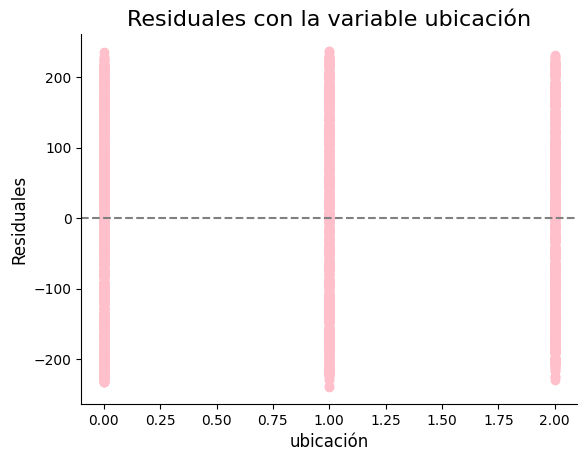

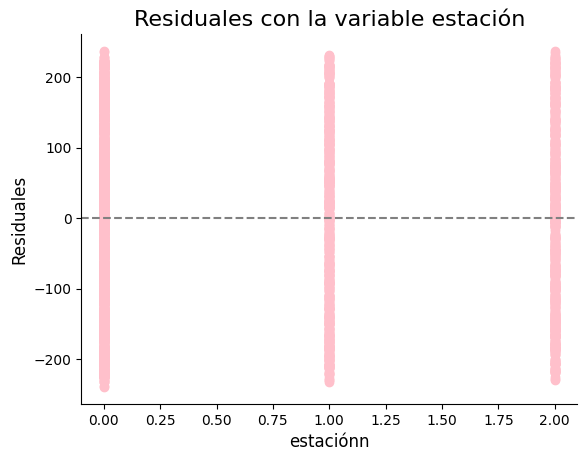

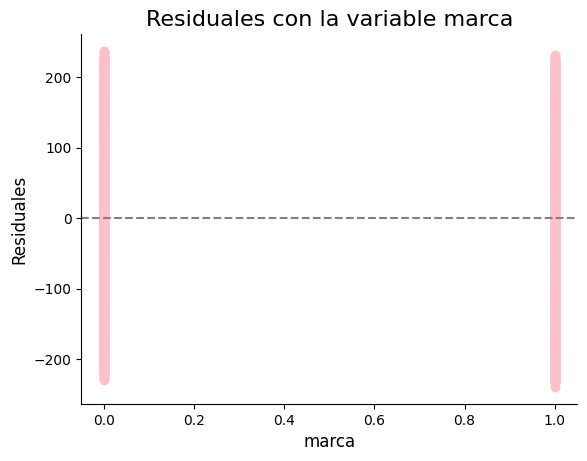

In [ ]:
x = df[["dias_de_entrega","categoría","material","color","ubicación","estación","marca"]]
y = df["precio"]

# recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

# coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# residuales y gráficos de dispersión.

residuales = modelo.resid
plt.figure()
plt.scatter(x["dias_de_entrega"], residuales, color = 'pink')
plt.xlabel('dias_de_entrega', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable dias de entrega", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["categoría"], residuales, color = 'pink')
plt.xlabel('categoría', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable categoría", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["material"], residuales, color = 'pink')
plt.xlabel('material', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable material", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["color"], residuales, color = 'pink')
plt.xlabel('color', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable color", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["ubicación"], residuales, color = 'pink')
plt.xlabel('ubicación', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable ubicación", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["estación"], residuales, color = 'pink')
plt.xlabel('estaciónn', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable estación", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["marca"], residuales, color = 'pink')
plt.xlabel('marca', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable marca", fontsize = 16)

# prueba de Shapiro
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')


# tabla ANOVA,
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols(
    "precio ~ dias_de_entrega + categoría + material + color + ubicación+ + estación + marca",
    data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

precio_estimado=f(características observables)

*Propuesta de regresión:*
El nuevo modelo de regresión considera las siguientes variables independientes:

* Categoría del mueble (silla, mesa, escritorio, sofá, etc.)

* Material (madera, plástico, metal, vidrio)

* Color

* Ubicación (urbana o suburbana)

* Estación del año (primavera, verano, otoño, invierno)

* Porcentaje de descuento

* Días de entrega

De esta forma, el modelo estima el precio final del producto sin requerir acceso a información interna de la empresa.


*Ventajas del modelo alternativo:*

* Transparencia: permite al cliente comprender cómo las características del producto influyen en el precio final.

* Accesibilidad: no requiere información confidencial o interna de la empresa.

* Confianza: los clientes pueden estimar precios justos y comparar productos de distintas marcas.

* Adaptabilidad: puede ser implementado en una plataforma digital o aplicación web para facilitar decisiones de compra personalizadas.


*Aplicaciones prácticas para el cliente:*

* Estimación de precios justos: el cliente puede introducir las características del producto y obtener un precio de referencia acorde al mercado.

* Comparación de materiales: permite conocer cómo varía el precio según el tipo de material y elegir la mejor opción calidad-precio.

* Planeación de compras: los compradores pueden analizar la influencia de factores estacionales o de ubicación para optimizar sus decisiones de compra.

* Negociación informada: contar con una estimación objetiva mejora la capacidad de negociación del cliente frente a distintos proveedores o tiendas.

In [ ]:
# =============================================================================
# MODELO PARA PRESENTAR A CLIENTES (Versión Simplificada)
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

print("=" * 70)
print("MODELO PARA CLIENTES - ANÁLISIS SIMPLIFICADO")
print("=" * 70)

# Preparar datos para el modelo
X = df[['precio', 'costo', 'ventas', 'margen_beneficio', 'porcentaje_descuento']]
y = df['ganancia']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
modelo_cliente = LinearRegression()
modelo_cliente.fit(X_train, y_train)

# Predicciones
y_pred = modelo_cliente.predict(X_test)

# Métricas del modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n RESULTADOS DEL MODELO PARA CLIENTES:")
print(f"• Coeficiente de Determinación (R²): {r2:.4f}")
print(f"• Error Cuadrático Medio (RMSE): {rmse:.2f}")

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_cliente.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print(f"\n VARIABLES MÁS INFLUYENTES:")
for idx, row in coeficientes.head(3).iterrows():
    impacto = "POSITIVO" if row['Coeficiente'] > 0 else "NEGATIVO"
    print(f"• {row['Variable']}: {row['Coeficiente']:.2f} ({impacto})")

# Gráfico simplificado para clientes
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ganancia Real')
plt.ylabel('Ganancia Predicha')
plt.title('Predicciones vs Realidades')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Ganancia Predicha')
plt.ylabel('Residuales')
plt.title('Análisis de Residuales')

plt.tight_layout()
plt.show()

# Recomendaciones para clientes
print(f"\n RECOMENDACIONES ESTRATÉGICAS:")
print("1. ENFOQUE EN MARGENES: Variables de costo y margen tienen alto impacto")
print("2. OPTIMIZAR DESCUENTOS: Balance entre descuentos y rentabilidad")
print("3. GESTIÓN DE INVENTARIO: Relación directa con ganancias")
print("4. ESTRATEGIA DE PRECIOS: Ajustar según sensibilidad del mercado")

# =============================================================================
# MODELO PARA PRESENTAR A LA EMPRESA (Versión Técnica Completa)
# =============================================================================

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro, normaltest

print("\n" + "=" * 70)
print("MODELO TÉCNICO PARA LA EMPRESA - ANÁLISIS COMPLETO")
print("=" * 70)

# Modelo estadístico completo con statsmodels
X_sm = sm.add_constant(X)  # Añadir intercepto
modelo_empresa = sm.OLS(y, X_sm).fit()

print("\n RESUMEN DEL MODELO ESTADÍSTICO:")
print(modelo_empresa.summary())

# ANOVA detallada
print("\n" + "=" * 50)
print("ANÁLISIS DE VARIANZA (ANOVA) - COMPARACIÓN DE MODELOS")
print("=" * 50)

# Crear fórmulas para diferentes modelos
formula_completo = 'ganancia ~ precio + costo + ventas + margen_beneficio + porcentaje_descuento'
formula_simple = 'ganancia ~ ventas + margen_beneficio'

modelo_completo = ols(formula_completo, data=df).fit()
modelo_simple = ols(formula_simple, data=df).fit()

# Tabla ANOVA comparativa
anova_result = anova_lm(modelo_simple, modelo_completo)
print("\nComparación de Modelos (Simple vs Completo):")
print(anova_result)

# ANOVA del modelo completo
print("\nANOVA del Modelo Completo:")
anova_completo = anova_lm(modelo_completo)
print(anova_completo)

# =============================================================================
# ANÁLISIS DE RESIDUALES - COMPARATIVO
# =============================================================================

print("\n" + "=" * 50)
print("ANÁLISIS DE RESIDUALES - VALIDACIÓN DEL MODELO")
print("=" * 50)

# Calcular residuales para ambos enfoques
residuals_cliente = y_test - y_pred
y_pred_full = modelo_empresa.predict(X_sm)
residuals_empresa = y - y_pred_full

# Estadísticos de residuales
print("\n ESTADÍSTICOS DE RESIDUALES:")
print(f"Modelo Cliente - Media: {residuals_cliente.mean():.4f}")
print(f"Modelo Cliente - Desviación: {residuals_cliente.std():.4f}")
print(f"Modelo Empresa - Media: {residuals_empresa.mean():.4f}")
print(f"Modelo Empresa - Desviación: {residuals_empresa.std():.4f}")

# Tests de normalidad
print("\n PRUEBAS DE NORMALIDAD DE RESIDUALES:")
shapiro_stat, shapiro_p = shapiro(residuals_empresa)
normaltest_stat, normaltest_p = normaltest(residuals_empresa)

print(f"Shapiro-Wilk: p-value = {shapiro_p:.4f}")
print(f"Normalidad D'Agostino: p-value = {normaltest_p:.4f}")

# Gráficos comparativos de residuales
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Residuales vs Predichos
axes[0,0].scatter(y_pred, residuals_cliente, alpha=0.6)
axes[0,0].axhline(y=0, color='r', linestyle='--')
axes[0,0].set_title('Residuales vs Predichos (Cliente)')
axes[0,0].set_xlabel('Predicciones')
axes[0,0].set_ylabel('Residuales')

axes[1,0].scatter(y_pred_full, residuals_empresa, alpha=0.6)
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_title('Residuales vs Predichos (Empresa)')
axes[1,0].set_xlabel('Predicciones')
axes[1,0].set_ylabel('Residuales')

# QQ-Plots
stats.probplot(residuals_cliente, dist="norm", plot=axes[0,1])
axes[0,1].set_title('QQ-Plot Residuales (Cliente)')

stats.probplot(residuals_empresa, dist="norm", plot=axes[1,1])
axes[1,1].set_title('QQ-Plot Residuales (Empresa)')

# Histogramas de residuales
axes[0,2].hist(residuals_cliente, bins=30, alpha=0.7, density=True)
x = np.linspace(residuals_cliente.min(), residuals_cliente.max(), 100)
axes[0,2].plot(x, stats.norm.pdf(x, residuals_cliente.mean(), residuals_cliente.std()), 'r-')
axes[0,2].set_title('Distribución Residuales (Cliente)')

axes[1,2].hist(residuals_empresa, bins=30, alpha=0.7, density=True)
x = np.linspace(residuals_empresa.min(), residuals_empresa.max(), 100)
axes[1,2].plot(x, stats.norm.pdf(x, residuals_empresa.mean(), residuals_empresa.std()), 'r-')
axes[1,2].set_title('Distribución Residuales (Empresa)')

plt.tight_layout()
plt.show()

# =============================================================================
# TABLAS COMPARATIVAS DE RESIDUALES
# =============================================================================

print("\n" + "=" * 50)
print("TABLAS DE RESIDUALES - COMPARACIÓN")
print("=" * 50)

# Crear DataFrames con residuales
residuals_df = pd.DataFrame({
    'Real': y,
    'Predicho_Empresa': y_pred_full,
    'Residual_Empresa': residuals_empresa,
    'Residual_Std_Empresa': residuals_empresa / residuals_empresa.std()
})

# Añadir datos de test para comparación
test_indices = X_test.index
residuals_df['Tipo'] = 'Entrenamiento'
residuals_df.loc[test_indices, 'Tipo'] = 'Prueba'
residuals_df.loc[test_indices, 'Predicho_Cliente'] = y_pred
residuals_df.loc[test_indices, 'Residual_Cliente'] = residuals_cliente

# Mostrar estadísticas descriptivas de residuales
print("\n ESTADÍSTICAS DESCRIPTIVAS DE RESIDUALES:")
residual_stats = pd.DataFrame({
    'Modelo_Cliente': [
        residuals_cliente.mean(),
        residuals_cliente.std(),
        residuals_cliente.min(),
        residuals_cliente.max(),
        len(residuals_cliente)
    ],
    'Modelo_Empresa': [
        residuals_empresa.mean(),
        residuals_empresa.std(),
        residuals_empresa.min(),
        residuals_empresa.max(),
        len(residuals_empresa)
    ]
}, index=['Media', 'Desviación', 'Mínimo', 'Máximo', 'N'])

print(residual_stats)

# Tabla de outliers en residuales
print("\n IDENTIFICACIÓN DE OUTLIERS EN RESIDUALES:")
outliers_empresa = residuals_df[np.abs(residuals_df['Residual_Std_Empresa']) > 2]
print(f"Número de outliers (|residual| > 2σ): {len(outliers_empresa)}")
print("\nTop 5 outliers más significativos:")
print(outliers_empresa.nlargest(5, 'Residual_Std_Empresa')[['Real', 'Predicho_Empresa', 'Residual_Empresa', 'Residual_Std_Empresa']])

# =============================================================================
# CONCLUSIÓN Y RECOMENDACIONES TÉCNICAS
# =============================================================================

print("\n" + "=" * 50)
print("CONCLUSIONES TÉCNICAS Y RECOMENDACIONES")
print("=" * 50)

# Guardar resultados para análisis posterior
resultados_comparativos = {
    'modelo_cliente': modelo_cliente,
    'modelo_empresa': modelo_empresa,
    'residuals_df': residuals_df,
    'anova_result': anova_result,
    'metricas': {
        'r2_cliente': r2,
        'rmse_cliente': rmse,
        'r2_empresa': modelo_empresa.rsquared,
        'r2_ajustado_empresa': modelo_empresa.rsquared_adj
    }
}
